<h2> Data Science for mortals </h2>
<p>
This notebook aims to guide you throught your first steps in the world of Data Science.
<span style="color:white">This is an easter egg</span>
<br />
The general concept of a Data Science project will be presented. After a brief introduction, the dataset will be presented. The goal of this notebook is to produce insights that will help us better understand the data.
</p>
<p>
The final goal of any Data Science project is to <em>automatically product data from existing data</em> in order to achive a defined goal. 
</p>

<p>
The figure below shows how a typical data science project evolves. 
</p>
<img src="https://www.mcgill.ca/datascience/files/datascience/styles/wysiwyg_extra_large/public/steps_1.jpg?itok=1-qto_iw"></img>

<p>
    This notebook will only focus on the first step, <em>Data Exploration</em> : in order to perform our prediction (the number of stars of a git project), we must familiarize ourselves not only with the data but with the whole git universe. This means that their is no magic involved in a Data Science project ; business knowledge is critical to achieve any serious Data Science task. <br>
</p>

In [70]:
%pylab inline
import pandas as pd
import seaborn
from pylab import rcParams
rcParams['figure.figsize'] = 16, 4

Populating the interactive namespace from numpy and matplotlib


<h3>Data Loading</h3>
<p>The cell below will load the data set and display its first rows</p>

In [72]:
dataSet = pd.read_csv("./customerLifetimeValue.csv", sep=";")
dataSet.head()

,customer_id,since_birth_parsed_days,price_first_item_purchased,gender,revenue,ip_country,ip_geopoint,ip_latitude,ip_longitude,pages_visited,campain,Country,GDP_cap
0,10863d9892,39,44.0,M,156,Spain,POINT(2.159 41.3888),41.3888,2.1590,6.0,False,spain,30058.0
1,21ec3b27e4,31,117.0,F,360,United States,POINT(-97.822 37.751),37.7510,-97.8220,5.0,False,united states,51704.0
2,9a8ba01761,35,44.0,M,188,Germany,POINT(7.6833 50.1),50.1000,7.6833,5.0,False,germany,38666.0
3,251ad74e43,31,57.0,F,343,United States,POINT(-84.5075 38.0287),38.0287,-84.5075,6.0,False,united states,51704.0
4,845b601310,45,22.0,F,88,Brazil,POINT(-43.2192 -22.8305),-22.8305,-43.2192,7.0,False,brazil,11747.0


<span>Some basic statistics can also be computed and shown with the following expression : </span>

In [73]:
dataSet.describe()

,since_birth_parsed_days,price_first_item_purchased,revenue,ip_latitude,ip_longitude,pages_visited,GDP_cap
count,29299.000000,29299.000000,29299.000000,29243.000000,29243.000000,29299.000000,28322.000000
mean,51.115669,40.600908,177.451654,34.955954,-9.362154,6.036145,36462.401208
std,28.417943,27.251376,69.052396,18.624989,88.221623,2.518203,16708.090946
min,-26.000000,10.000000,28.000000,-53.787700,-172.333300,1.000000,665.000000
25%,32.000000,22.000000,133.000000,33.596400,-92.895300,4.000000,20562.000000
50%,41.000000,42.000000,172.000000,37.751000,-1.162800,6.000000,38666.000000
75%,58.000000,44.000000,217.000000,43.631900,54.000000,7.000000,51704.000000
max,117.000000,117.000000,549.000000,69.666700,176.204400,14.000000,100889.000000


<p>
    At this point, the simpliest and the most common way of starting the exploration phase is to perform an <em>univariate analysis</em> : we will try to establish simple correlations between our variables - or features  (forks, size, issues, language...) - and the target (stargazers_count).

<br />

    The way of proceeding is simple ; let's ask ourselves the following question :  <b>how the target behaves when we split our dataset depending on the value a feature ?</b>
</p>

<p>
    Before answering this question, a distinction must be made. There are two kind of variables : <br>
    Ones are quantitavite and called <em>numerical</em> (the size of the repo for exemple) and others are qualitative and called <em>categorical</em> (the language of the repo).
</p>

<h3> Insight - qualitative features</h3>

<p>
    As it was said before, their are two kinds of variables. We will take a look at the last ones, the categoricals.
</p>
<p>
As a first approach, we can plot the mean revenue by country :
</p>

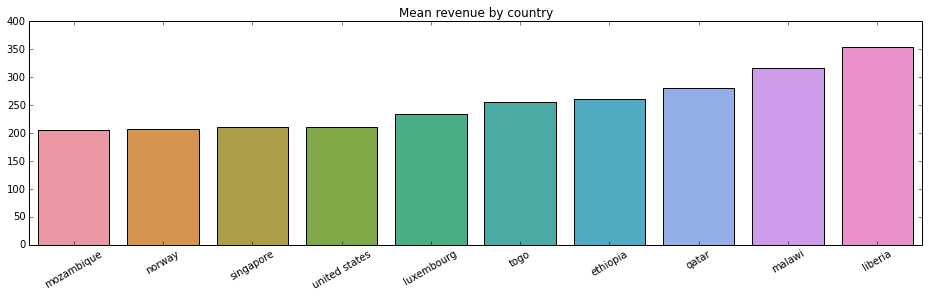

In [103]:
gbCountry = dataSet.groupby("Country")["revenue"].mean()
gbCountry = gbCountry.sort_values()[-10:]
plt.title("Mean revenue by country")
g = seaborn.barplot(gbCountry.index.values, gbCountry.values)#, palette=["#5BA0D1"]*5)
_=g.set_xticklabels(gbCountry.index.values,rotation=30)
plt.show()

<p>
    Ok ! Lets unravel the code above line by line.
    <ul>
          <li>
            The first line groups all the repos by country and computes the mean value of the
            <code>revenue</code> feature (our target)
        </li>
        
        <li>
            The following line sorts the countries by ascending mean value and only keeps the 10 first values
        </li>
        <li>
            The third line sets a title to the figure and the fourth draws a bar plot with <code>gbCountry.index.values</code> as keys and
            <code>gbCountry.values</code> as values
        </li>
        <li>
            The x labels (<code>gbCountry.index.values</code>) are rotated for aestethics purposes
        </li>
        
        <li>
            Finaly, the figure is plotted
        </li>
    </ul>
</p>
<p>
    And Voilà ! Our first insight. We now know that a correlation may exist between the language used and the target.
</p>
<p>
    What we just did is the bread and butter of a Data Science project : highlighting correlations to perform a prediction.   
</p>
<p>
    Also, you may find the results quiet surpising. But bear in mind that it is just a average, and the subsample is really small in some cases (their is only one Liberian buyer in the data set).
</p>

<h3> Insight - quantitative feature</h3>
<p>
    The same goes now with numerical features : in the last cells, the data set was splitted in <em>groups</em> or <em>subsamples</em> sharing a common <em>feature</em>. The target was then studied in each <em>subsample</em>. For continuous or numerical values, it goes the same way : we will simply plot (or in our case more specifically <em>scatter</em>) how our target behaves with regards to a specific feature - in this case, the <code>GDP_cap</code>
</p>

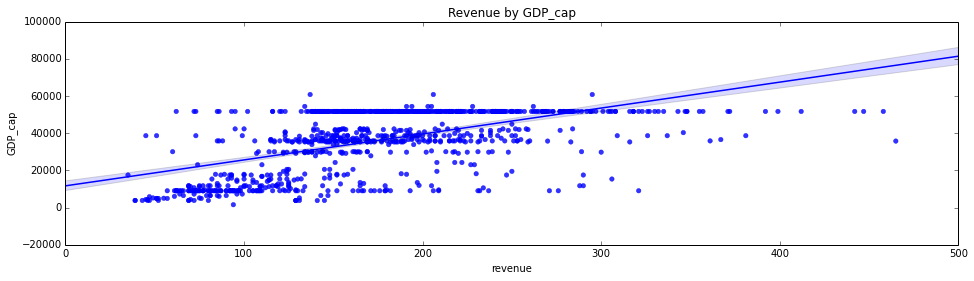

In [100]:
plt.title("Revenue by GDP_cap")
subsample = dataSet.sample(n=1000)
seaborn.regplot(subsample["revenue"], subsample["GDP_cap"])

<p>
    The figure above may lead us to think that heir is a <em>positive</em> relation between the <code>GDP_cap</code> and the <code>revenue</code> : the greater is the first variables the greater is the second one.
</p>
<h3>Whats next ? </h3>
<p>
        At this stage of the notebook, we've loaded the data, gathered a few insights about our target, and handeled some basic plotting functions. 
</p>
<p>
    Albeit the exploration phase could go longer, I invite you to meet me at the next notebook where you will build your first model !
</p>